# Prediccion de riesgo accidente cerebrovascular

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('./data-limpia.csv')
df.dropna(inplace=True)


In [39]:
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [40]:
df.groupby(['Residence_type', 'stroke']).size()

Residence_type  stroke
Rural           0         2318
                1          100
Urban           0         2381
                1          109
dtype: int64

### 1. ¿Donde se da la mayor cantidad de ataques, en zonas urbanas o rurales?
Se observa que en zonas rurales y en zonas urbanas, la cantidad de personas que sufrieron o no un ataque es similiar. Uno pensaría que en zonas urbanas el número de ataques sería mayor debido al ritmo acelerado que hay en las ciudades pero la diferencia es casi imperceptible.

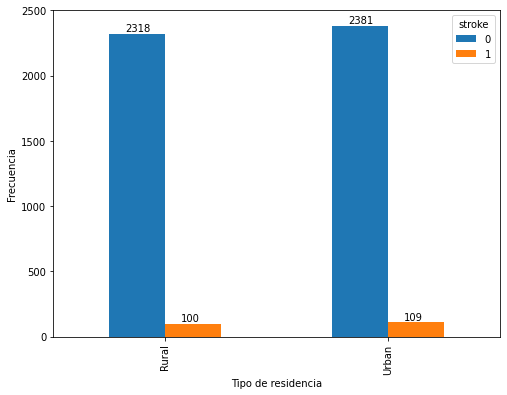

In [41]:
per_ataque = df.groupby(['Residence_type', 'stroke']).size().unstack(fill_value=0).reset_index()

fig, axes = plt.subplots(figsize=(8, 6))
# axes.set_title("Número de personas que sufrieron un ataque según su Residencia")
per_ataque.plot(x="Residence_type", y=[0, 1], kind="bar", ax=axes)
axes.set_xlabel("Tipo de residencia")
axes.set_ylabel("Frecuencia")
for p in axes.patches:
    axes.annotate(str(p.get_height()), (p.get_x() + 0.07, p.get_height() + 20))


### 2. ¿Los niveles de glucosa están asociados a producir un ataque?

El valor normal de la glusoa media estimada (eAG) está entre 70 mg/dl y 114  mg/dl. Una persona con prediabetes tiene entre 114 mg/dL y 140 mg/dL mientras que una persona con diabetes el eAG es superior a 140 mg/dL. En la gráfica se observa la distribución de eAG es similar en ambos casos (stroke y no stroke), sin embargo hay una mayor cantidad de personas que sufrieron de un ataque estando con diabetes y un mayor número de personas que no sufrieron un ataque teniendo niveles normales de eAG. Por lo que tener niveles altos de glucosa podría ser una de las causas de sufrir un ataque.

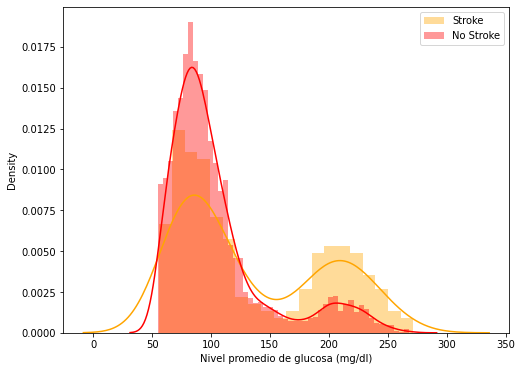

In [42]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(df[df.stroke == 1].avg_glucose_level, color='orange', label='Stroke', bins=20)
sns.distplot(df[df.stroke == 0].avg_glucose_level, color='red', label='No Stroke')
plt.legend()
plt.xlabel("Nivel promedio de glucosa (mg/dl)")
plt.show()


### 3. ¿De los que sufrieron un ataque quienes fuman más?
Se observa que hay una mayor cantidad de mujeres que no ha fumando sin embargo sufrió un ataque.

In [49]:
df_stroke = df.loc[(df.stroke == 1) & (df.smoking_status == 'smokes')] 
df_stroke = df_stroke[["gender", "smoking_status"]].groupby("smoking_status").value_counts()
df_stroke


smoking_status  gender
smokes          Male      21
                Female    18
dtype: int64

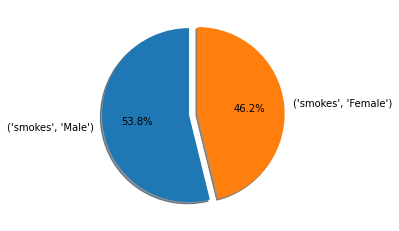

In [51]:
data = df_stroke.values
keys = df_stroke.index
explode = (0.0, 0.1) 

fig1, ax1 = plt.subplots()
# ax1.set_title("Género de personas que sufrieron un ataque y no fuman")
ax1.pie(data, explode=explode, labels=keys, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

### 4. ¿Que edades son más propensos a sufrir un ataque en cada tipo de empleo?
De la grafica se observa que en todos los tipos de empleo hay un mayor número de casos de ataque en los adultos mayores.

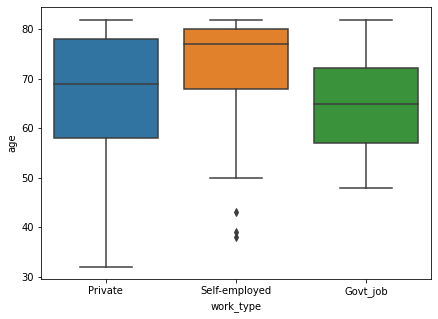

In [53]:
plt.figure(figsize=(7, 5))
df_stroke = df.loc[(df.stroke == 1) & (df.age > 18)]
sns.boxplot(x='work_type', y='age', data=df_stroke)
plt.show()


### 5. ¿Qué porcentaje de mujeres con diabetes sufrieron un ataque?

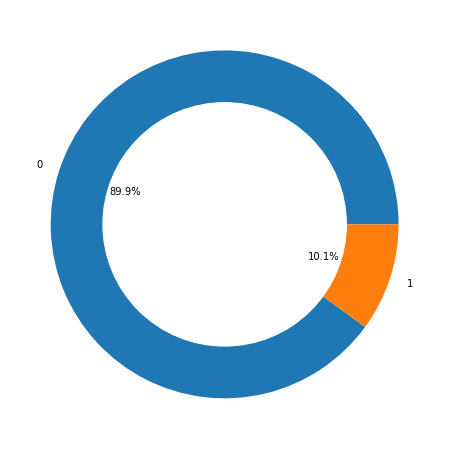

In [46]:
df_glucosa = df.loc[(df.avg_glucose_level > 140) & (df.gender == 'Female')]
vals = df_glucosa["stroke"].value_counts()
data = vals.values
keys = vals.index

explode = (0.0, 0.0)

fig1, ax1 = plt.subplots(figsize=(8, 8))
# ax1.set_title(" Porcentaje de mujeres con diabetes que sufrieron un ataque")
ax1.pie(data, explode=explode, labels=keys, autopct='%1.1f%%')
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


### Referencias
https://www.healthline.com/health/estimated-average-glucose